In [64]:
import pandas as pd
from colossus.cosmology import cosmology
from colossus.lss import mass_function
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [228]:
ec = pd.read_csv("euclid_clusters.csv", index_col = 0)
ec.groupby('z').head()

,mass,z,vol
0,1.060613e+14,0.506,1.479387e+10
1,1.097076e+14,0.506,1.479387e+10
2,1.588869e+14,0.506,1.479387e+10
3,1.336345e+14,0.506,1.479387e+10
4,3.078288e+14,0.506,1.479387e+10
168897,1.122773e+14,1.019,4.783826e+10
168898,1.382684e+14,1.019,4.783826e+10
168899,2.561905e+14,1.019,4.783826e+10
168900,1.418248e+14,1.019,4.783826e+10
168901,1.452855e+14,1.019,4.783826e+10


In [3]:
ec.groupby("z").count()

,mass,vol
z,,
0.506,168897,168897
1.019,142007,142007
1.500,51733,51733


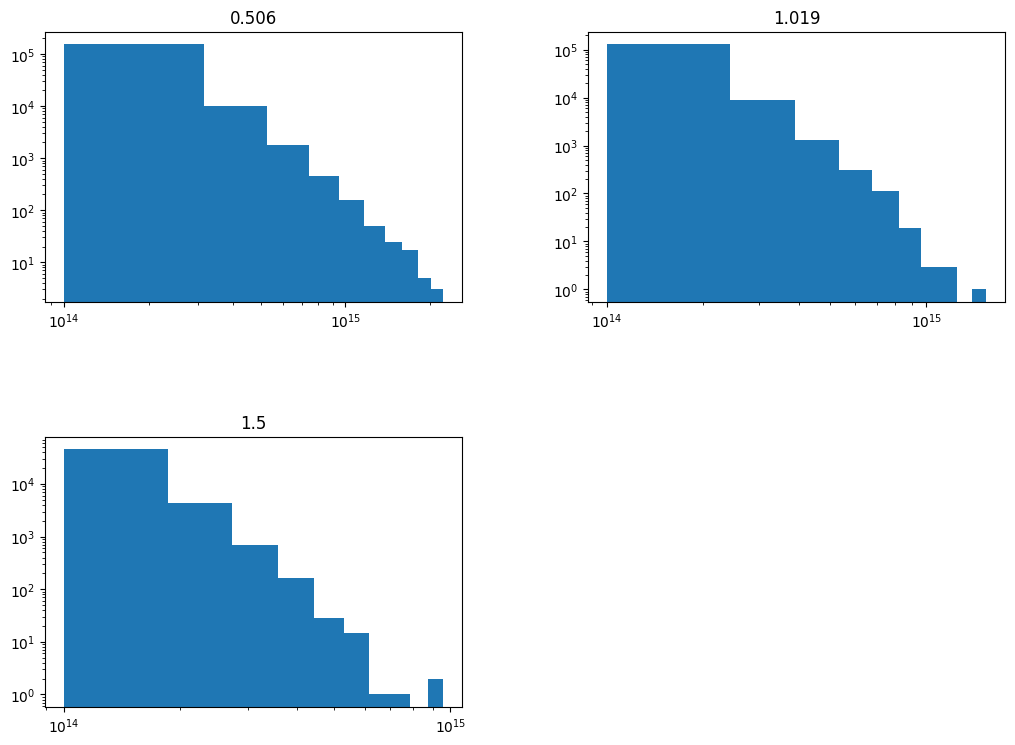

In [22]:
# ec["den"] = ec["mass"]/(ec["vol"])
# ec["logden"] = np.log(ec["den"])
axes = ec.hist(["mass"], by = "z", xrot = 0, figsize = (12, 9))
for ax in axes.flatten():
    ax.loglog()
plt.show()

In [289]:
M0 = np.sort(ec['mass'].iloc[:168897])
M1 = np.sort(ec['mass'].iloc[168897:310904])
M2 = np.sort(ec['mass'].iloc[310904:])

z0 = ec['z'].iloc[0]
z1 = ec['z'].iloc[168897]
z2 = ec['z'].iloc[310904]

V0 = ec['vol'].iloc[0]
V1 = ec['vol'].iloc[168897]
V2 = ec['vol'].iloc[310904]

n0 = len(M0)/V1
n1 = len(M1)/V2
n2 = len(M2)/V3

W0 = 1/(V1 * np.log(np.ptp(M0))) * np.ones(len(M0))
W1 = n1/np.log(np.ptp(M1)) * np.ones(len(M1))
W2 = n2/np.log(np.ptp(M2)) * np.ones(len(M2))

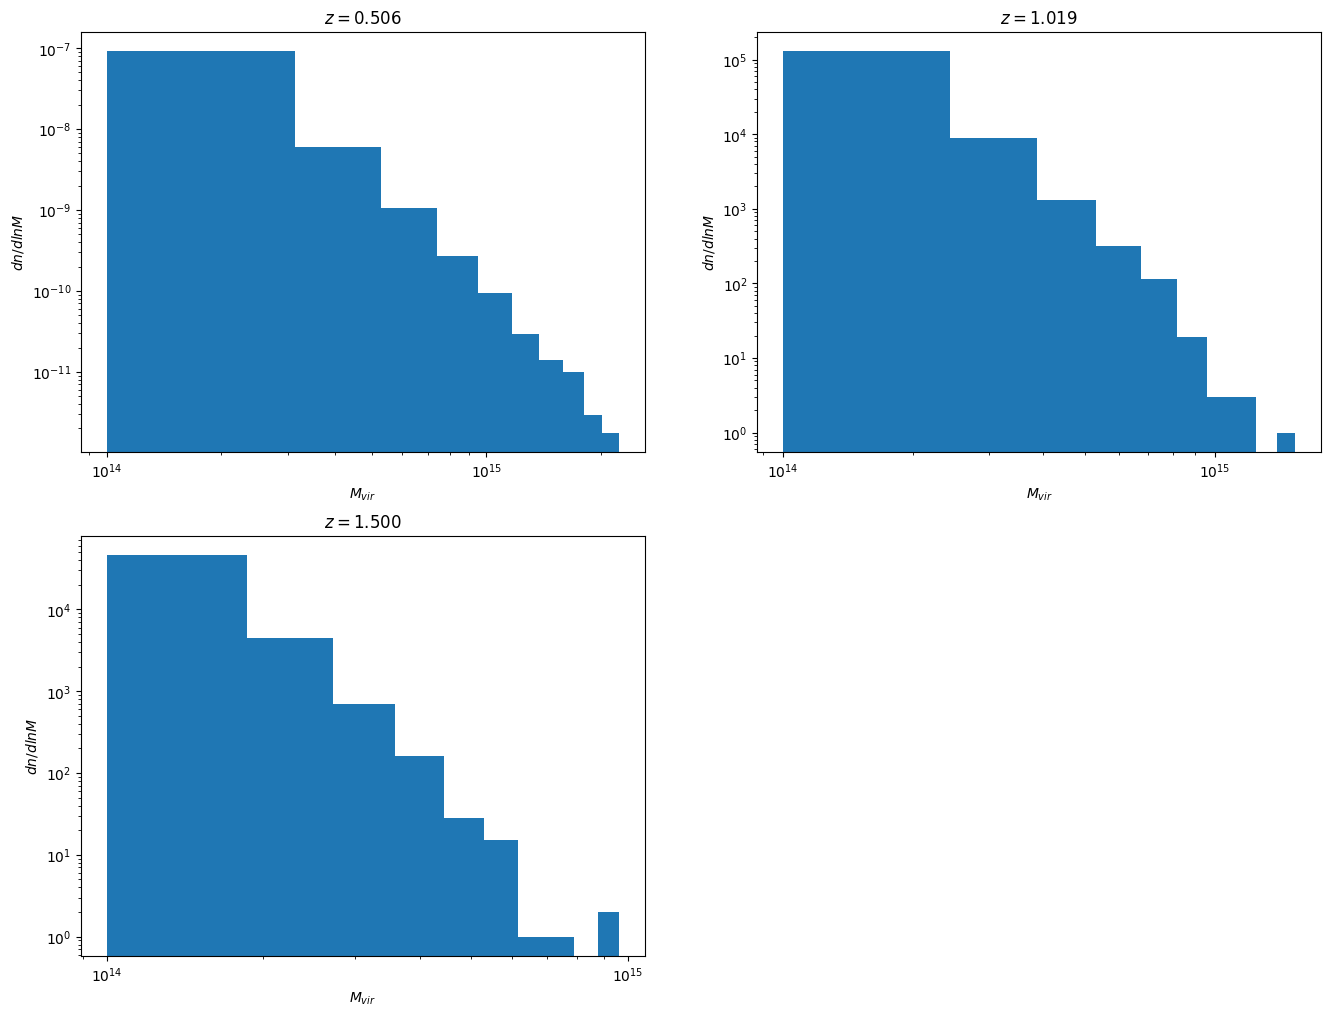

In [293]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (16, 12))

ax0.set(xlabel = '$M_{vir}$', ylabel = '$dn/dlnM$',
        xscale = 'log', yscale = 'log', 
        title = '$z = 0.506$')
ax0.loglog
ax0.hist(M0, weights = W0)

ax1.set(xlabel = '$M_{vir}$', ylabel = '$dn/dlnM$',
        xscale = 'log', yscale = 'log', 
        title = '$z = 1.019$')
ax1.loglog
ax1.hist(M1)

ax2.set(xlabel = '$M_{vir}$', ylabel = '$dn/dlnM$',
        xscale = 'log', yscale = 'log', 
        title = '$z = 1.500$')
ax2.loglog
ax2.hist(M2)

plt.delaxes(ax = ax3)
plt.show()